# Data Science Proejct : Hotel Bookings Data Analaysis 
## Karim Abdelrahman Elsayed 

# Installing and importing the required libraries 

# **the data set is from Kaggle : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand**

In [ ]:
import pandas as pd               
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px       #Faster Plotting & for map
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['font.size'] = 20                    #Setting rcParams at runtime takes precedence
plt.rcParams['figure.figsize'] = 20,12
sns.set(style = 'darkgrid')

### **Data Preparation and Cleaning**

In [ ]:
df = pd.read_csv('hotel_bookings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.shape

(58890, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


Looking at the number of null values for each column 

In [ ]:
df.isnull().sum().sort_values(ascending = False)

company                           55411
agent                              9132
country                             478
children                              4
customer_type                         1
days_in_waiting_list                  1
reservation_status_date               1
adr                                   1
required_car_parking_spaces           1
total_of_special_requests             1
reservation_status                    1
previous_cancellations                0
deposit_type                          0
booking_changes                       0
assigned_room_type                    0
reserved_room_type                    0
previous_bookings_not_canceled        0
hotel                                 0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58890 entries, 0 to 58889
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           58890 non-null  object 
 1   is_canceled                     58890 non-null  int64  
 2   lead_time                       58890 non-null  int64  
 3   arrival_date_year               58890 non-null  int64  
 4   arrival_date_month              58890 non-null  object 
 5   arrival_date_week_number        58890 non-null  int64  
 6   arrival_date_day_of_month       58890 non-null  int64  
 7   stays_in_weekend_nights         58890 non-null  int64  
 8   stays_in_week_nights            58890 non-null  int64  
 9   adults                          58890 non-null  int64  
 10  children                        58886 non-null  float64
 11  babies                          58890 non-null  int64  
 12  meal                            

Displaying some statistical summaries of the numerical columns:

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,58886.000000,58890.000000,58890.000000,58890.000000,58890.000000,58890.000000,49758.000000,58889.000000,58889.000000,58889.000000,58889.000000
mean,0.411360,100.046714,2015.974597,27.837426,15.767159,1.058142,2.847631,1.860740,0.112947,0.010647,0.030192,0.069197,0.099626,0.242995,146.981310,3.526278,96.251314,0.096690,0.512184
std,0.492084,101.157752,0.687274,13.346370,8.783033,1.093056,2.235539,0.634778,0.419726,0.111210,0.171116,1.102185,0.829200,0.695194,120.113863,21.842580,58.557048,0.300326,0.768375
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,60.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.000000,0.000000,84.000000,0.000000,0.000000
75%,1.000000,157.000000,2016.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,120.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


dropping rows with 0 adult guests 

In [ ]:
df = df[df['adults'] != 0]

dropping hotels with 0 average daily rate

In [ ]:
df = df[df['adr'] > 0.00]

In [ ]:
df.shape

(57858, 32)

seprate dataframe for non cancellation resevrations

In [ ]:
non_cancelled_reservations_df = df[df['is_canceled'] == 0]

In [ ]:
non_cancelled_reservations_df.shape

(33800, 32)

In [ ]:
non_cancelled_reservations_df['Total Guests'] = non_cancelled_reservations_df['adults'] + non_cancelled_reservations_df['children'] + non_cancelled_reservations_df['babies']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
non_cancelled_reservations_df['price_per_guest'] = non_cancelled_reservations_df['adr']/(non_cancelled_reservations_df['adults'] + non_cancelled_reservations_df['children'] + non_cancelled_reservations_df['babies'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **Exploring our data**


In [ ]:
non_cancelled_reservations_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

The dataset has data from the year 2015 to 2017. 

**Hotel**

In [ ]:
px.histogram (df, x = "hotel", color = 'is_canceled')

It appears that City Hotel has more reservations than Resort Hotel and I believe that is also the reason why it has more cancellations as well. 

**HOW many days GUests reserve befor arriving**

In [ ]:
px.histogram (df, x = "lead_time", nbins = 500, marginal = "box")

Most of the reservations are made in the system 0 to 1 day before the guests arrive in the hotel. 

**is_canceled**

In [ ]:
fig = px.bar(df, x = df.is_canceled.value_counts().index,
             y = df['is_canceled'].value_counts().to_list(), 
             labels = {'y' : 'Count', 
                       'x' : 'Not-Cancelled (0) or Canceled (1)'}
            )
fig.update_xaxes(type='category')
fig

It seems like close to 40% of the reservations were canceled.

**is_canceled vs. deposit type**

In [ ]:
px.histogram(x=df.deposit_type, color=df.is_canceled)

Most of the reservation do not require an initial deposit. It is surprising to see that all non-refundable reservations were canceled. It also looks like the hotel does not charge an initial deposit fee while the customers make their reservations. 

**distribution_channel**

In [ ]:
px.histogram(df, x = "distribution_channel", color = 'is_canceled')

Most of the bookings come from Travel Agents or Tour Operators.  

**price_per_guest vs. hotel type**

City Hotel is costlier than Resort Hotel and it looks like the price_per_guest of City Hotel is increasing over the years. 

**meal**

In [ ]:
fig = px.bar(df, x = df.meal.value_counts().index,
             y = df['meal'].value_counts().to_list())
             
fig.show()

The categories in the meal column mean:
- **BB**: Bed & Breakfast
- **HB**:: Half board (breakfast and one other meal – usually dinner) 
- **FB**: Full board (breakfast, lunch and dinner)
- **Undefined/SC**: no meal package

Bed & Breakfast is the most common option among the customers.

**meal vs. price per guest**

**1. What is the busiest month? How the number of guests have changed over the years?**

In [ ]:
bookings_count_df = pd.DataFrame(non_cancelled_reservations_df.groupby(['arrival_date_year', 'arrival_date_month']).hotel.count())
bookings_count_df.reset_index(inplace = True)

In [ ]:
results = bookings_count_df.pivot('arrival_date_year', 'arrival_date_month','hotel')

In [ ]:
results = results.fillna(0)
months = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
results = results.reindex(columns = months)

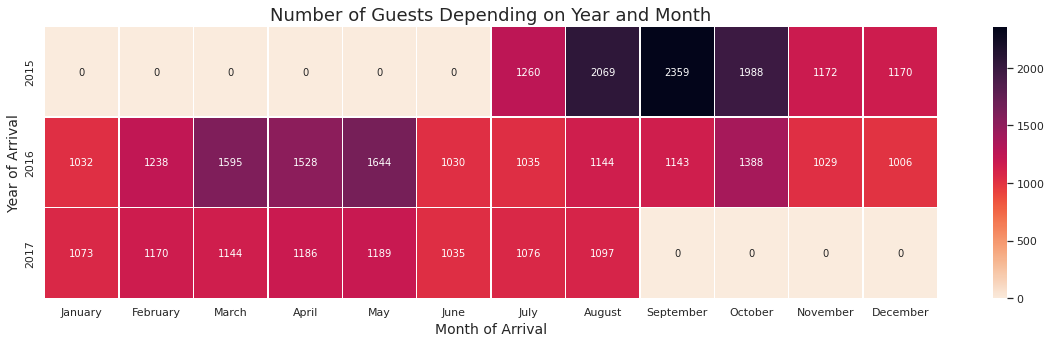

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(results, 
            annot = True, 
            fmt = "0.0f", 
            linewidths = .5, 
            cmap = 'rocket_r')
plt.xlabel('Month of Arrival', fontsize = 14)
plt.ylabel('Year of Arrival', fontsize = 14)
plt.title('Number of Guests Depending on Year and Month', fontsize = 18);

The dataset has data from the year 2015 to 2017 with months of data missing for year 2015 and 2017. It seems like september has the highest number of bookings followed by August with second highest bookings 

In [ ]:
non_cancelled_reservations_df['arrival_date_month'] = pd.Categorical(non_cancelled_reservations_df['arrival_date_month'], 
                                                                     categories = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'],
                                                                     ordered = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.histogram(non_cancelled_reservations_df, 
             x = 'arrival_date_month', 
             color = 'hotel', 
             facet_row = 'arrival_date_year',       
             category_orders = {'arrival_date_month' : ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']}, 
             barmode = 'group',
             height = 1000, width = 900,
             labels = {
                 'arrival_date_month' : 'Month of Arrival', 
                 'count' : 'Number of Guests', 
                 'arrival_date_year' : 'Year of Arrival', 
                 'hotel' : 'Hotel Type'
             }, 
             title = "Number of Guests Over the Years By Months and Hotel Type"     
                  )
fig.show()

**2. Where do the guests Come From?**

In [ ]:
country_counts = non_cancelled_reservations_df['country'].value_counts()
country_counts_df = pd.DataFrame({'Country' : country_counts.index, 
                                  'Count' : country_counts.values})

In [ ]:
px.choropleth(
    country_counts_df, 
    locations = 'Country',
    color = 'Count',     
    labels={'Count':'Number of Guests'}, 
    title = 'Home Country of Guests'
    )

The guests come from all over the world but we can see that the majority of the guests come from Spain and other parts of Europe.

**3. How long do the guests stay?**

In [ ]:
non_cancelled_reservations_df['total_nights_stays'] = non_cancelled_reservations_df['stays_in_weekend_nights'] + non_cancelled_reservations_df['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
resort_hotel_df = non_cancelled_reservations_df[non_cancelled_reservations_df['hotel'] == 'Resort Hotel']
resort_hotel_stays_count = resort_hotel_df['total_nights_stays'].value_counts()
resort_hotel_stays_df = pd.DataFrame( {'hotel': 'Resort Hotel','total_nights_stays' : resort_hotel_stays_count.index, 'count' : resort_hotel_stays_count.values })

In [ ]:
city_hotel_df = non_cancelled_reservations_df[non_cancelled_reservations_df['hotel'] == 'City Hotel']
city_hotel_stays_count = city_hotel_df['total_nights_stays'].value_counts()
city_hotel_stays_df = pd.DataFrame( {'hotel': 'City Hotel','total_nights_stays' : city_hotel_stays_count.index, 'count' : city_hotel_stays_count.values })

In [ ]:
stays_df = resort_hotel_stays_df.append(city_hotel_stays_df)

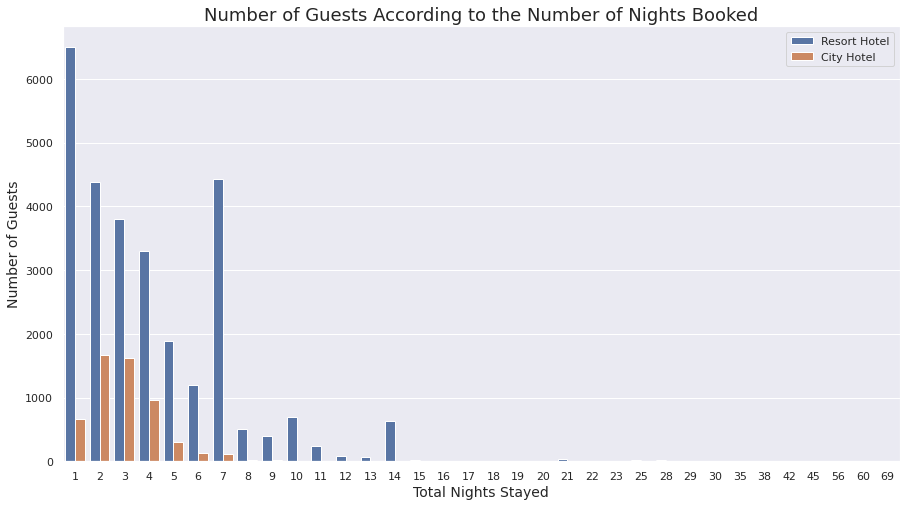

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(data = stays_df, 
            x = 'total_nights_stays', 
            y = 'count', 
            hue = 'hotel', 
            )
plt.xlabel('Total Nights Stayed', fontsize = 14)
plt.ylabel('Number of Guests', fontsize = 14)
plt.title('Number of Guests According to the Number of Nights Booked', fontsize = 18)
plt.legend(loc = 'upper right'); 

On an average most of the guests stay for around 1 to 4 nights. 

**4. What Market Segment do the most bookings come from?**

In [ ]:
market_segment_counts = non_cancelled_reservations_df['market_segment'].value_counts()
market_segment_df = pd.DataFrame({'market_segment' : market_segment_counts.index, 
                                 'count' : non_cancelled_reservations_df['market_segment'].value_counts()})
market_segment_df.reset_index(drop = True, inplace = True)

In [ ]:
fig = px.treemap(non_cancelled_reservations_df, 
           path = [px.Constant('market_segment'),market_segment_df['market_segment']], 
           values = market_segment_df['count'].tolist(),
           color = market_segment_df['count'].tolist(), 
           color_continuous_scale='RdBu_r', 
           title = "Market Segment of Guests"
                )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Majority of the guests come from Online and Offline TA/TOs with Online being the most. 

**6. How many bookings were cancelled?**


In [ ]:
city_hotel_cancellation = df[df['hotel'] == 'City Hotel']
city_hotel_cancellation['is_canceled'] = city_hotel_cancellation['is_canceled'].replace([0,1], ['Not Canceled', 'Canceled'])
city_hotel_cancellation_count = city_hotel_cancellation['is_canceled'].value_counts()
city_hotel_cancellation_df = pd.DataFrame( {'hotel': 'City Hotel','is_canceled' : city_hotel_cancellation_count.index, 'count' : city_hotel_cancellation_count.values })

resort_hotel_cancellation = df[df['hotel'] == 'Resort Hotel']
resort_hotel_cancellation['is_canceled'] = resort_hotel_cancellation['is_canceled'].replace([0,1], ['Not Canceled', 'Canceled'])
resort_hotel_cancellation_count = resort_hotel_cancellation['is_canceled'].value_counts()
resort_hotel_cancellation_df = pd.DataFrame( {'hotel': 'Resort Hotel','is_canceled' : resort_hotel_cancellation_count.index, 'count' : resort_hotel_cancellation_count.values })

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cancellation_df = city_hotel_cancellation_df.append(resort_hotel_cancellation_df)

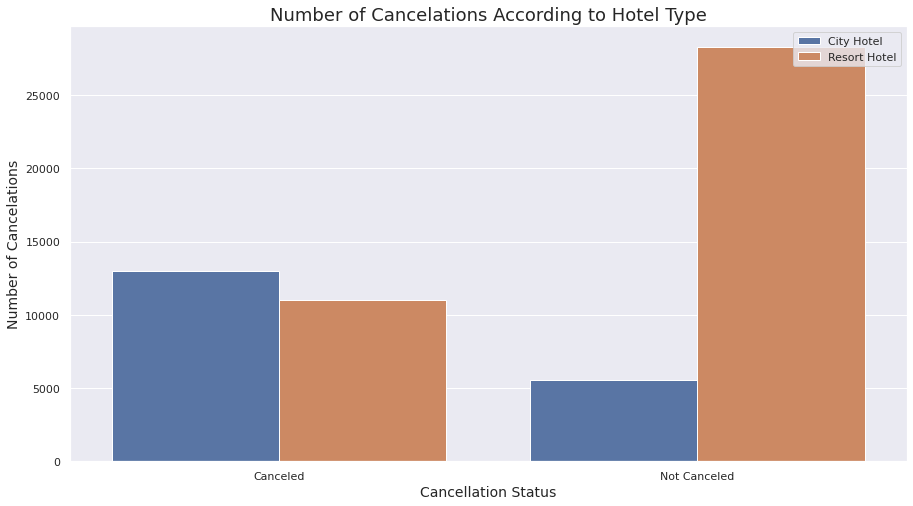

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(data = cancellation_df, 
            x = 'is_canceled', 
            y = 'count', 
            hue = 'hotel')
plt.xlabel('Cancellation Status', fontsize = 14)
plt.ylabel('Number of Cancelations', fontsize = 14)
plt.title('Number of Cancelations According to Hotel Type', fontsize = 18)
plt.legend(loc = 'upper right'); 

City Hotel has more number of cancellations than Resort Hotel. 

Text(0.5, 1.0, 'Number of Cancellations according to Month')

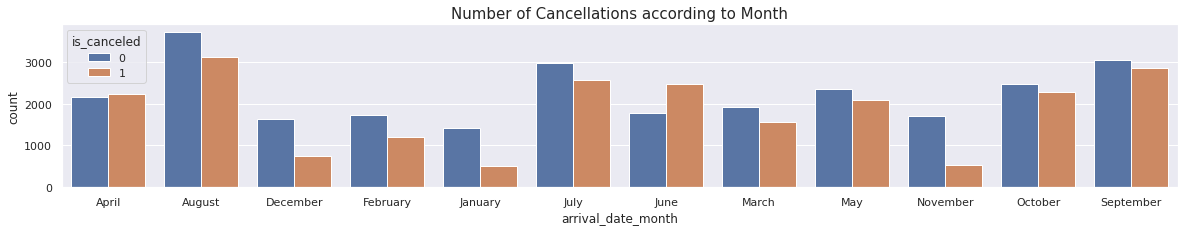

In [ ]:
sns.countplot(data = df, 
              x = 'arrival_date_month', 
              hue = 'is_canceled'
              )
plt.title('Number of Cancellations according to Month', fontsize = 15)


August and July have the most cancellations

**7. Which room type is most popular?**

In [ ]:
city_hotel_room_type = city_hotel_df['assigned_room_type'].value_counts()
city_hotel_room_type_df = pd.DataFrame({ 'hotel' : 'City Hotel', 'room_type' : city_hotel_room_type.index ,'count' : city_hotel_room_type.values})

resort_hotel_room_type = resort_hotel_df['assigned_room_type'].value_counts()
resort_hotel_room_type_df = pd.DataFrame({ 'hotel' : 'Resort Hotel', 'room_type' : resort_hotel_room_type.index ,'count' : resort_hotel_room_type.values})

In [ ]:
room_type_df = city_hotel_room_type_df.append(resort_hotel_room_type_df)

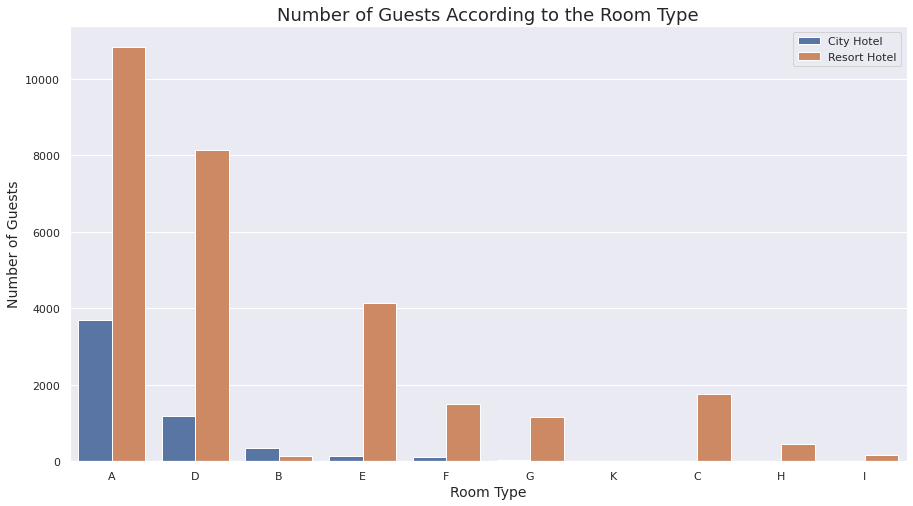

In [ ]:
plt.figure(figsize = (15,8))
sns.barplot(data = room_type_df, 
            x = 'room_type', 
            y = 'count', 
            hue = 'hotel')
plt.xlabel('Room Type', fontsize = 14)
plt.ylabel('Number of Guests', fontsize = 14)
plt.title('Number of Guests According to the Room Type', fontsize = 18)
plt.legend(loc = 'upper right'); 

Room Type A for City Hotel seems to be the most popular choice of guests. This can be due to the fact that City Hotel type A has the lowest price per guest. 

**8. What is the customer type of the bookings?**

In [ ]:
px.pie(non_cancelled_reservations_df, 
       values = non_cancelled_reservations_df['customer_type'].value_counts(), 
       names = non_cancelled_reservations_df['customer_type'].unique(), 
       title = 'Customer Segment of Bookings')

The figure shows that the average price per room depends on its type and the standard deviation.

In [ ]:
data = df[df['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

How does the price vary per night over the year?

In [ ]:
data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,77.602459
1,August,183.687392
2,December,71.498677
3,February,55.395559
4,January,50.241999
5,July,152.801548
6,June,109.917426
7,March,58.329825
8,May,78.547660
9,November,50.153764


In [ ]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel
final_hotel = resort_hotel.merge(city_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final_hotel

,month,price_for_resort,price_for_city_hotel
0,April,77.602459,84.978054
1,August,183.687392,86.998405
2,December,71.498677,88.380281
3,February,55.395559,74.742566
4,January,50.241999,81.238537
5,July,152.801548,79.777993
6,June,109.917426,91.855312
7,March,58.329825,78.955223
8,May,78.547660,102.378078
9,November,50.153764,66.794982


We observe that months were not sorted


In [ ]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=08bedb92a479e64c7238e4eb9ffacb3f75f64fef052c38e29f0d1e170def31c2
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=973091fbea0aa9157e6f35779b4f366f3e2e4e8d1feab0fe2cb105185a34155c
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
final_prices = sort_month(final_hotel, 'month')
final_prices

,month,price_for_resort,price_for_city_hotel
0,January,50.241999,81.238537
1,February,55.395559,74.742566
2,March,58.329825,78.955223
3,April,77.602459,84.978054
4,May,78.547660,102.378078
5,June,109.917426,91.855312
6,July,152.801548,79.777993
7,August,183.687392,86.998405
8,September,97.577390,99.148912
9,October,63.577850,88.537025


In [ ]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1224x576 with 0 Axes>

## **BUILDING THE MODEL**


In [ ]:
df=df.drop(['company'],axis=1)

In [ ]:
df=df.dropna(axis=0)

In [ ]:
categorical_features = ['hotel','is_canceled','arrival_date_week_number','meal','country','market_segment',
                        'distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type',
                        'deposit_type','agent','customer_type','reservation_status','arrival_date_month']

In [ ]:
df[categorical_features]=df[categorical_features].astype('category')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y=df['is_canceled']

In [ ]:
y

3        0
4        0
5        0
7        0
8        1
        ..
58884    1
58885    1
58886    1
58887    1
58888    1
Name: is_canceled, Length: 48999, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
X =df.drop(['is_canceled','reservation_status_date'],axis=1)

In [ ]:
X

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,A,0,No Deposit,304.0,0.0,Transient,75.0,0.0,0.0,Check-Out
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0.0,Transient,98.0,0.0,1.0,Check-Out
5,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,A,0,No Deposit,240.0,0.0,Transient,98.0,0.0,1.0,Check-Out
7,Resort Hotel,9,2015,July,27,1,0,2,2,0.0,...,C,0,No Deposit,303.0,0.0,Transient,103.0,0.0,1.0,Check-Out
8,Resort Hotel,85,2015,July,27,1,0,3,2,0.0,...,A,0,No Deposit,240.0,0.0,Transient,82.0,0.0,1.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58884,City Hotel,605,2016,October,43,17,1,2,2,0.0,...,A,0,Non Refund,1.0,0.0,Transient,60.0,0.0,0.0,Canceled
58885,City Hotel,605,2016,October,43,17,1,2,2,0.0,...,A,0,Non Refund,1.0,0.0,Transient,60.0,0.0,0.0,Canceled
58886,City Hotel,605,2016,October,43,17,1,2,2,0.0,...,A,0,Non Refund,1.0,0.0,Transient,60.0,0.0,0.0,Canceled
58887,City Hotel,605,2016,October,43,17,1,2,2,0.0,...,A,0,Non Refund,1.0,0.0,Transient,60.0,0.0,0.0,Canceled


In [ ]:
#converting the categorical data into dummy variable  
X_dum=pd.get_dummies(X,prefix_sep='-',drop_first=True)

In [ ]:
X_dum

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,...,agent-510.0,agent-526.0,agent-527.0,agent-531.0,agent-535.0,customer_type-Group,customer_type-Transient,customer_type-Transient-Party,reservation_status-Check-Out,reservation_status-No-Show
3,13,2015,1,0,1,1,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,14,2015,1,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,14,2015,1,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,9,2015,1,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,85,2015,1,0,3,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58884,605,2016,17,1,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58885,605,2016,17,1,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58886,605,2016,17,1,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
58887,605,2016,17,1,2,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_dum,y, test_size=.3,random_state=40,shuffle=True)

In [ ]:
X_train

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,...,agent-510.0,agent-526.0,agent-527.0,agent-531.0,agent-535.0,customer_type-Group,customer_type-Transient,customer_type-Transient-Party,reservation_status-Check-Out,reservation_status-No-Show
45094,102,2015,16,0,2,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
21123,2,2016,18,0,1,1,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
36127,213,2017,4,2,5,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
57964,172,2016,4,0,3,2,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
29780,111,2016,27,2,8,2,0.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35917,220,2017,5,0,1,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
18216,37,2015,8,2,5,2,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
39444,2,2017,16,0,2,1,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
57175,55,2016,20,0,3,2,2.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#using logistic regression model
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.special import expit
import numpy as np

In [ ]:
logistic=LogisticRegression()


In [ ]:
from sklearn.utils import shuffle
 
X_shuffle, y_shuffle = shuffle(X_dum, y)

In [ ]:
logistic.fit(X_shuffle,y_shuffle)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
#predicting the test data
y_pred= logistic.predict(X_test)

In [ ]:
# calculating the  accuracy, precision,recall and f1-score for logistic regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
accuracy_score(y_test,y_pred)

0.9817006802721089

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98      7974\n           1       0.98      0.98      0.98      6726\n\n    accuracy                           0.98     14700\n   macro avg       0.98      0.98      0.98     14700\nweighted avg       0.98      0.98      0.98     14700\n'

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

In [ ]:
roc_curve(y_test,y_pred)

(array([0.        , 0.01354402, 1.        ]),
 array([0.        , 0.97606304, 1.        ]),
 array([2, 1, 0]))

In [ ]:
roc_auc_score(y_test,y_pred)

0.9812595104473124

In [ ]:
#creating  confusion matrix for logistic reression
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7866,  108],
       [ 161, 6565]])